In [3]:
import audformat
import pandas as pd

In [11]:
df_sample = pd.read_csv('../age_files/sample_list.csv', index_col='file')

In [12]:
df_sample.head(2)

,speaker,sex,age
file,,,
Natalie/NB_1_m_33.wav,NB_1_m_33,m,33
Natalie/NB_2_w_67.wav,NB_2_f_67,f,67


In [13]:
df_sample = df_sample.rename(columns={'sex':'gender'})
df_sample.to_csv('../age_files/ml_age_df.csv')

In [14]:
# Add a column for duration in seconds
def calc_dur(x):
    starts = x[1]
    ends = x[2]
    return (ends - starts).total_seconds()
# add the root folder for audio samples
root = '/home/felix/data/TU/WS2022/ML/age_files/'
df_sample = df_sample.set_index(df_sample.index.to_series().map(lambda x:root+x))
# add start and end times
df_sample = df_sample.set_index(audformat.utils.to_segmented_index(df_sample.index, allow_nat=False))
# compute duration
df_sample['duration'] = df_sample.index.to_series().map(lambda x:calc_dur(x)) 

In [15]:
df_sample.head()

speaker  \
file                                              start  end                                 
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 0 days 00:01:14.492250  NB_1_m_33   
                                                         0 days 00:01:10.339500  NB_2_f_67   
                                                         0 days 00:00:42.519750  NB_3_f_41   
                                                         0 days 00:01:27.354750  NB_4_m_61   
                                                         0 days 00:01:18.718500  NB_5_m_59   

                                                                                gender  \
file                                              start  end                             
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 0 days 00:01:14.492250      m   
                                                         0 days 00:01:10.339500      f   
                                                         0 days 00:00:42.519750      f   
                                                         0 days 00:01:27.354750      m   
                                                         0 days 00:01:18.718500      m   

                                                                                 age  \
file                                              start  end                           
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 0 days 00:01:14.492250   33   
                                                         0 days 00:01:10.339500   67   
                                                         0 days 00:00:42.519750   41   
                                                         0 days 00:01:27.354750   61   
                                                         0 days 00:01:18.718500   59   

                                                                                 duration  
file                                              start  end                               
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 0 days 00:01:14.492250  74.49225  
                                                         0 days 00:01:10.339500  70.33950  
                                                         0 days 00:00:42.519750  42.51975  
                                                         0 days 00:01:27.354750  87.35475  
                                                         0 days 00:01:18.718500  78.71850

In [16]:
df_sample.shape

(79, 4)

<AxesSubplot: ylabel='Frequency'>

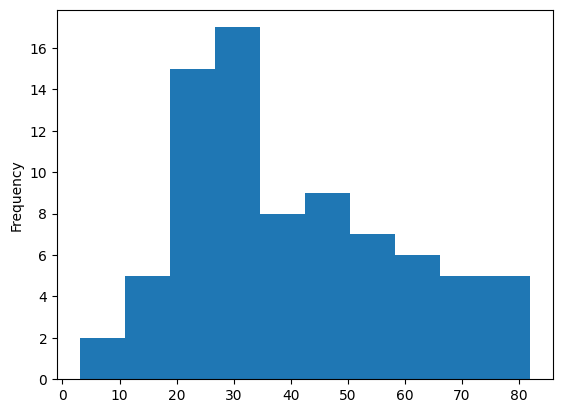

In [17]:
df_sample.age.plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

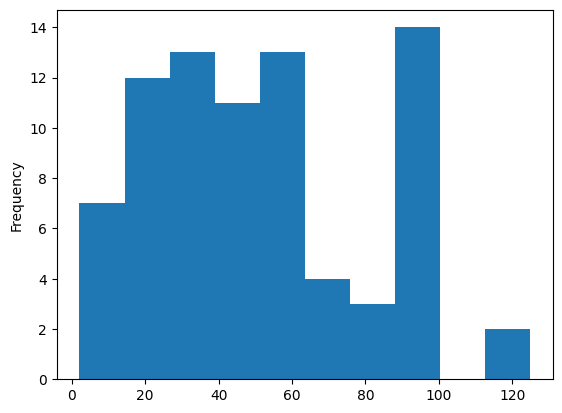

In [18]:
df_sample.duration.plot(kind='hist')

In [19]:
df_sample.duration.idxmax()

('/home/felix/data/TU/WS2022/ML/age_files/hanna/hs12_30.wav',
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:02:04.945375'))

In [20]:
df_sample.duration.idxmin()

('/home/felix/data/TU/WS2022/ML/age_files/felix/004_f_45.wav',
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:02.078187'))

In [21]:
# segment the data
from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from audformat.utils import to_filewise_index
from audformat import segmented_index
seg = Segmenter()

2023-01-18 14:52:35.762333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 14:52:36.265030: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 14:52:36.265070: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 14:52:38.285411: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [ ]:
df_sample.head(1)

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_segmentation(file):
    print(f'segmenting {file[0]}')
    segmentation = seg(file[0])
    files, starts, ends = [], [], []
    for entry in segmentation:
        kind = entry[0]
        start = entry[1]
        end = entry[2]
        if kind == 'female' or kind == 'male':
            #print (f'{file}, {start}, {end}')
            files.append(file[0])
            starts.append(start)
            ends.append(end)
    seg_index = segmented_index(files, starts, ends)
    return seg_index

def segment_dataframe(df):
    dfs = []
    for file, values in df.iterrows():
        index = get_segmentation(file)
        dfs.append(
            pd.DataFrame(
                values.to_dict(),
                index,
            )
        )
    return audformat.utils.concat(dfs)

df_seg = segment_dataframe(df_sample)


segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_1_m_33.wav
14/14 [==============================] - 1s 46ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_2_w_67.wav
71/71 [==============================] - 3s 48ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_3_w_41.wav
47/47 [==============================] - 2s 43ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_4_m_61.wav
129/129 [==============================] - 2s 14ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_5_m_59.wav
112/112 [==============================] - 2s 14ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_6_w_60.wav
34/34 [==============================] - 2s 47ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_7_w_26.wav
59/59 [==============================] - 1s 13ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/Natalie/NB_8_w_30.wav
44/44 [===========================

/home/felix/data/TU/WS2022/ML/venv/lib/python3.8/site-packages/inaSpeechSegmenter/segmenter.py:61: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/home/felix/data/TU/WS2022/ML/venv/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


46/46 [==============================] - 2s 43ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm02_f_31.wav
46/46 [==============================] - 2s 43ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm03_f_82.wav
 5/22 [=====>........................] - ETA: 0s

/home/felix/data/TU/WS2022/ML/venv/lib/python3.8/site-packages/inaSpeechSegmenter/segmenter.py:61: RuntimeWarning: invalid value encountered in subtract
  data = (data - np.mean(data, axis=1).reshape((len(data), 1))) / np.std(data, axis=1).reshape((len(data), 1))
/home/felix/data/TU/WS2022/ML/venv/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


22/22 [==============================] - 1s 44ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm04_m_60.wav
60/60 [==============================] - 3s 43ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm05_f_58.wav
48/48 [==============================] - 2s 44ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm06_m_14.wav
27/27 [==============================] - 1s 44ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm06_m_34.wav
27/27 [==============================] - 1s 44ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm06_m_57.wav
61/61 [==============================] - 3s 44ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm07_m_32.wav
37/37 [==============================] - 2s 44ms/step
segmenting /home/felix/data/TU/WS2022/ML/age_files/magdalena/mm08_f_31.wav
39/39 [==============================] - 2s 44ms/step
segmenting /home/felix/data/TU/WS2022/ML/ag

In [23]:
# Add a column for duration in seconds
df_seg['duration'] = df_seg.index.to_series().map(lambda x:calc_dur(x)) 

In [24]:
df_seg.head()

speaker  \
file                                              start                  end                                 
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 00:00:03.440000 0 days 00:00:05.740000  NB_1_m_33   
                                                  0 days 00:00:07.880000 0 days 00:00:13.240000  NB_1_m_33   
                                                  0 days 00:01:10.660000 0 days 00:01:11.640000  NB_1_m_33   
                                                  0 days 00:00:01.940000 0 days 00:00:07.360000  NB_2_f_67   
                                                  0 days 00:00:15.220000 0 days 00:00:23.860000  NB_2_f_67   

                                                                                                gender  \
file                                              start                  end                             
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 00:00:03.440000 0 days 00:00:05.740000      m   
                                                  0 days 00:00:07.880000 0 days 00:00:13.240000      m   
                                                  0 days 00:01:10.660000 0 days 00:01:11.640000      m   
                                                  0 days 00:00:01.940000 0 days 00:00:07.360000      f   
                                                  0 days 00:00:15.220000 0 days 00:00:23.860000      f   

                                                                                                 age  \
file                                              start                  end                           
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 00:00:03.440000 0 days 00:00:05.740000   33   
                                                  0 days 00:00:07.880000 0 days 00:00:13.240000   33   
                                                  0 days 00:01:10.660000 0 days 00:01:11.640000   33   
                                                  0 days 00:00:01.940000 0 days 00:00:07.360000   67   
                                                  0 days 00:00:15.220000 0 days 00:00:23.860000   67   

                                                                                                 duration  
file                                              start                  end                               
/home/felix/data/TU/WS2022/ML/age_files/Natali... 0 days 00:00:03.440000 0 days 00:00:05.740000      2.30  
                                                  0 days 00:00:07.880000 0 days 00:00:13.240000      5.36  
                                                  0 days 00:01:10.660000 0 days 00:01:11.640000      0.98  
                                                  0 days 00:00:01.940000 0 days 00:00:07.360000      5.42  
                                                  0 days 00:00:15.220000 0 days 00:00:23.860000      8.64

<AxesSubplot: ylabel='Frequency'>

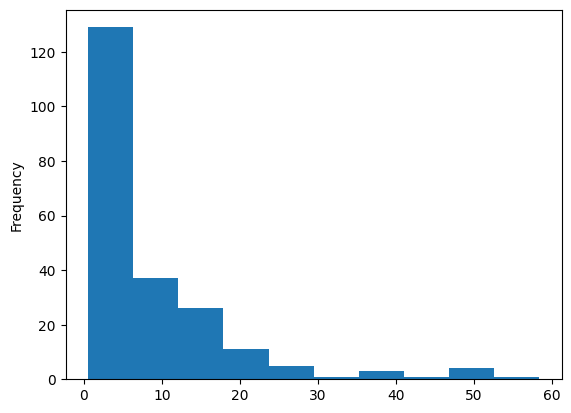

In [25]:
df_seg.duration.plot(kind='hist')

In [26]:
df_seg.to_csv('../age_files/ml_age_segmented.csv')